<a href="https://colab.research.google.com/github/fridaarizmon1304/ProyectofinalFridaAriz/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta Seccion iniciamos el codigo cargando


In [9]:
import pandas as pd
import numpy as np
import os

# Carga del archivo
df = pd.read_csv('/content/vehicles.csv')

df.shape, df.head()



ruta = "/content/vehicles.csv"

# Validar si el archivo existe
if os.path.exists(ruta):
    print("✔ Archivo encontrado. Cargando...")
    df = pd.read_csv(ruta)
    print("✔ Archivo listo. Dimensiones:", df.shape)
    df.head()
else:
    print("❌ El archivo no se encuentra en /content. Verifica el nombre.")


✔ Archivo encontrado. Cargando...
✔ Archivo listo. Dimensiones: (426880, 26)


En esta Seccion empezamos la limpieza del archivo


In [10]:
# Limpieza Inspección inicial
df.info()

# Resumen estadístico de las columnas numéricas
df.describe()

# Porcentaje de nulos por columna
null_percent = df.isnull().mean().sort_values(ascending=False) * 100
null_percent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

,0
county,100.000000
size,71.767476
cylinders,41.622470
condition,40.785232
VIN,37.725356
drive,30.586347
paint_color,30.501078
type,21.752717
manufacturer,4.133714
title_status,1.930753


In [11]:
# Limpieza Seleccion de columnas

cols_to_keep = [
    'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
    'fuel', 'odometer', 'title_status', 'transmission', 'state',
    'type', 'paint_color'
]

df = df[cols_to_keep].copy()
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,state,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN


In [12]:
# Limpieza Antes de eliminar duplicados
print("Filas antes de drop_duplicates:", df.shape[0])

df = df.drop_duplicates()

print("Filas después de drop_duplicates:", df.shape[0])

# Eliminar filas sin precio, año u odómetro
df = df.dropna(subset=['price', 'year', 'odometer'])

df.shape

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

# Si algo quedó como NaN por errores, los eliminamos nuevamente
df = df.dropna(subset=['price', 'year', 'odometer'])

df.dtypes

# Filtros lógicos
df = df[(df['price'] >= 500) & (df['price'] <= 100000)]
df = df[(df['year'] >= 1980) & (df['year'] <= 2024)]
df = df[(df['odometer'] >= 0) & (df['odometer'] <= 500000)]

df.shape

Filas antes de drop_duplicates: 426880
Filas después de drop_duplicates: 298838


(262624, 13)

In [13]:
#limpieza (rellena los datos invalidos con unknow)

cat_cols = ['manufacturer', 'model', 'condition', 'cylinders',
            'fuel', 'title_status', 'transmission', 'state',
            'type', 'paint_color']

for col in cat_cols:
    df[col] = df[col].fillna('unknown')

df.isnull().mean().sort_values(ascending=False)[:10]

,0
price,0.0
year,0.0
manufacturer,0.0
model,0.0
condition,0.0
cylinders,0.0
fuel,0.0
odometer,0.0
title_status,0.0
transmission,0.0


In [14]:
df.to_csv('/content/vehicles_clean.csv', index=False)
df.shape

(262624, 13)

In [15]:
import pandas as pd

df = pd.read_csv('/content/vehicles_clean.csv')

print("Datos del dataset limpio:", df.shape)
df.head()

Datos del dataset limpio: (262624, 13)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,state,type,paint_color
0,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,al,pickup,white
1,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,al,pickup,blue
2,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,al,pickup,red
3,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,al,pickup,red
4,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,al,truck,black


En esta Seccion iniciamos a hacer el reporte.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262624 entries, 0 to 262623
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         262624 non-null  int64  
 1   year          262624 non-null  float64
 2   manufacturer  262624 non-null  object 
 3   model         262624 non-null  object 
 4   condition     262624 non-null  object 
 5   cylinders     262624 non-null  object 
 6   fuel          262624 non-null  object 
 7   odometer      262624 non-null  float64
 8   title_status  262624 non-null  object 
 9   transmission  262624 non-null  object 
 10  state         262624 non-null  object 
 11  type          262624 non-null  object 
 12  paint_color   262624 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 26.0+ MB


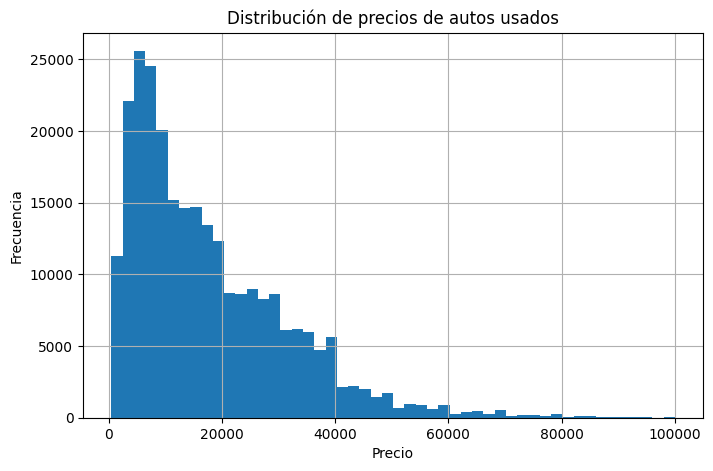

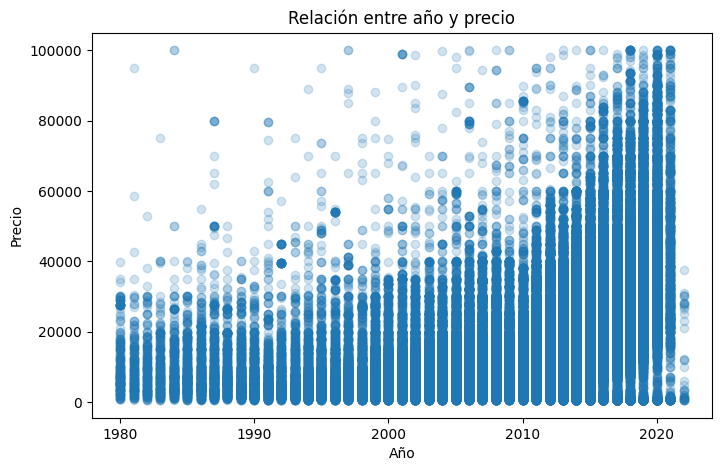

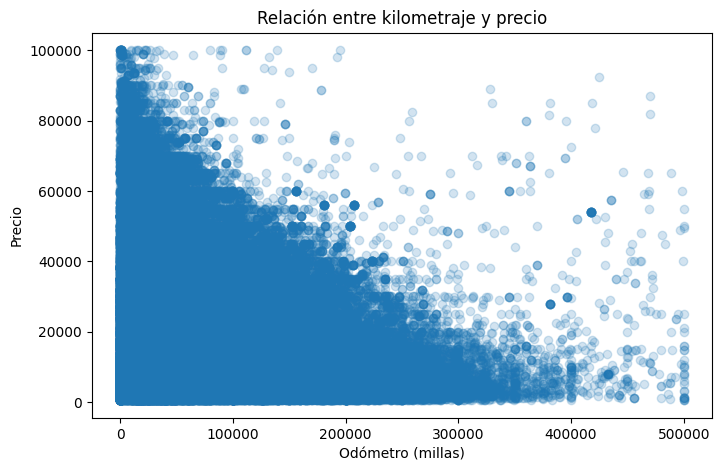

In [16]:
df.info()
df.describe()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['price'].hist(bins=50)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de autos usados')
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['price'], alpha=0.2)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Relación entre año y precio')
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(df['odometer'], df['price'], alpha=0.2)
plt.xlabel('Odómetro (millas)')
plt.ylabel('Precio')
plt.title('Relación entre kilometraje y precio')
plt.show()

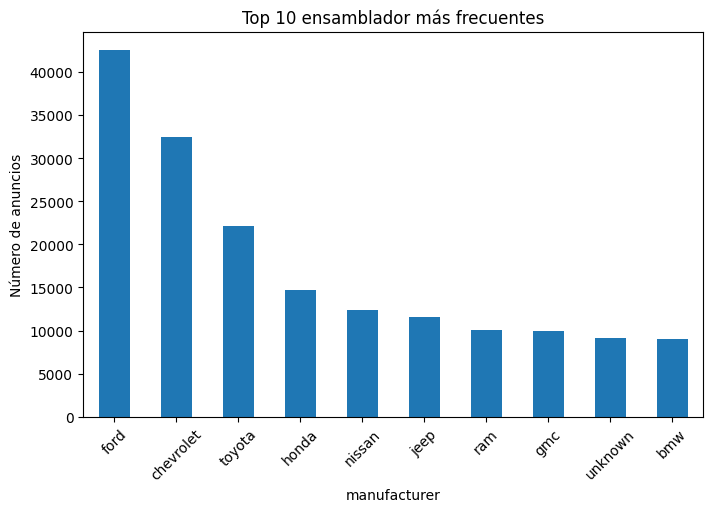

In [17]:
top_manu = df['manufacturer'].value_counts().head(10)
plt.figure(figsize=(8,5))
top_manu.plot(kind='bar')
plt.ylabel('Número de anuncios')
plt.title('Top 10 ensamblador más frecuentes')
plt.xticks(rotation=45)
plt.show()


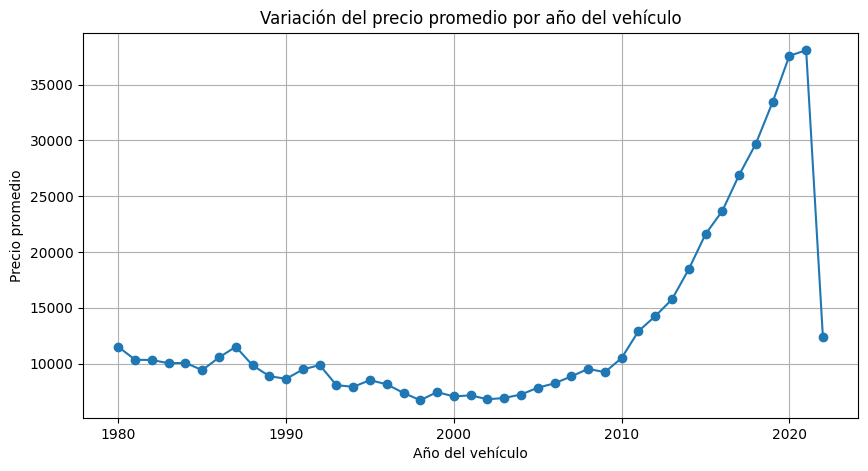

In [18]:
import matplotlib.pyplot as plt

# Calcular el precio promedio por año
avg_price_by_year = df.groupby('year')['price'].mean()

plt.figure(figsize=(10,5))
avg_price_by_year.plot(kind='line', marker='o')
plt.xlabel('Año del vehículo')
plt.ylabel('Precio promedio')
plt.title('Variación del precio promedio por año del vehículo')
plt.grid(True)
plt.show()

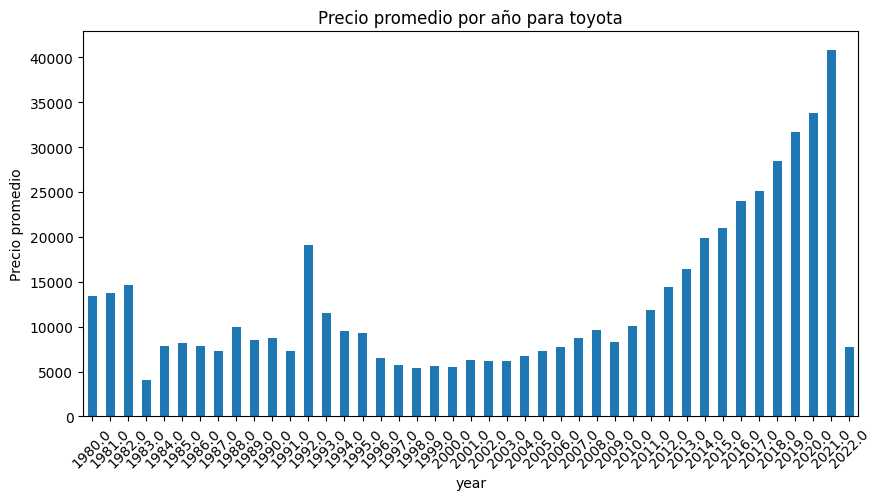

In [19]:
fab = 'toyota'  # aquí cambias a honda, ford, etc.

df_fab = df[df['manufacturer'] == fab]

avg_price_fab_year = df_fab.groupby('year')['price'].mean()

plt.figure(figsize=(10,5))
avg_price_fab_year.plot(kind='bar')
plt.ylabel('Precio promedio')
plt.title(f'Precio promedio por año para {fab}')
plt.xticks(rotation=45)
plt.show()

In [20]:
top_manu = df['manufacturer'].value_counts().head(10)
top_manu

avg_price_manu = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
avg_price_manu

avg_price_year = df.groupby('year')['price'].mean().sort_values()
avg_price_year.tail(10)  # por ejemplo, los años más recientes


,price
year,
2012.0,14255.235334
2013.0,15758.266024
2014.0,18456.411501
2015.0,21600.122184
2016.0,23679.674330
2017.0,26889.987520
2018.0,29701.343991
2019.0,33430.822428
2020.0,37581.257656


In [21]:
num_registros = len(df)
num_columnas = df.shape[1]
num_fabricantes = df['manufacturer'].nunique()
num_modelos = df['model'].nunique()

precio_promedio = df['price'].mean()
precio_mediano = df['price'].median()
anio_promedio = df['year'].mean()
km_promedio = df['odometer'].mean()

num_registros, num_columnas, num_fabricantes, num_modelos, precio_promedio, precio_mediano, anio_promedio, km_promedio

(262624,
 13,
 43,
 25146,
 np.float64(17782.86447544779),
 13995.0,
 np.float64(2011.3186951687583),
 np.float64(98632.0763867735))

Machine Learning

In [26]:
# ========================================
# 1. Seleccionar muestra
# ========================================
import pandas as pd

df_model = df.sample(n=40000, random_state=42) if len(df) > 40000 else df.copy()

# ========================================
# 2. Separar variables
# ========================================
y = df_model["price"]
X = df_model.drop(columns=["price"])

numeric_features = ["year", "odometer"]
categorical_features = [
    "manufacturer", "model", "condition", "cylinders",
    "fuel", "title_status", "transmission",
    "state", "type", "paint_color"
]

# ========================================
# 3. Preprocesamiento
# ========================================
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

# ========================================
# 4. Dividir dataset
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ========================================
# 5. Modelo Random Forest (rápido)
# ========================================
rf = RandomForestRegressor(
    n_estimators=40,
    max_depth=12,
    min_samples_leaf=10,
    n_jobs=-1,
    random_state=42
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", rf)
])

# ========================================
# 6. Entrenar
# ========================================
print("Entrenando modelo..Respira ....")
model.fit(X_train, y_train)
print("Listo Modelo entrenado!")

# ========================================
# 7. Evaluación
# ========================================
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Entrenando modelo..Respira ....
Listo Modelo entrenado!
RMSE: 7209.54
R²: 0.7388
